In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df= pd.read_csv("zomato-data-.csv")

In [86]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [87]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

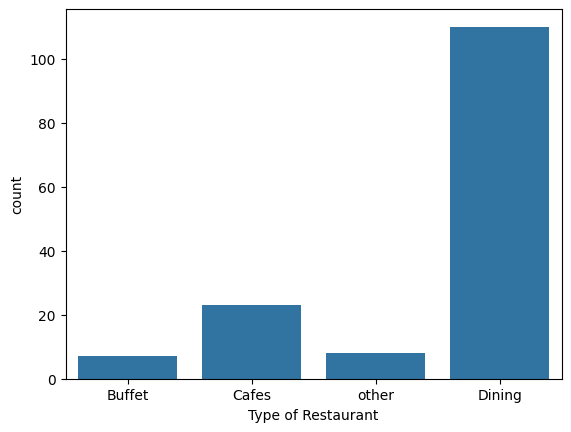

In [89]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

In [90]:
# Votes by restaurant type
grp_data=df.groupby('listed_in(type)')['votes'].sum()
grp_data




listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [91]:
result=pd.DataFrame({'votes':grp_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Number of Votes')

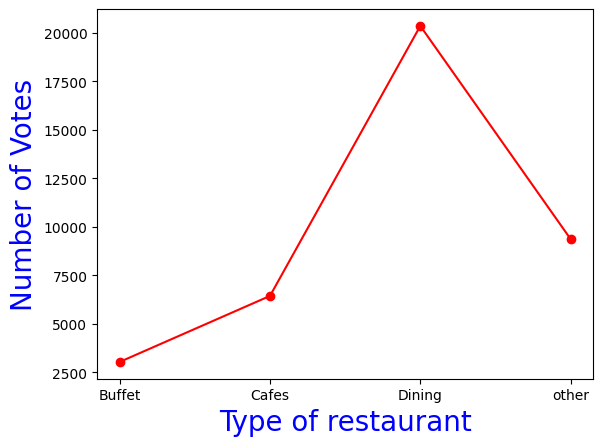

In [92]:
plt.plot(result, c='red',marker='o')
plt.xlabel("Type of restaurant", c='blue', size=20)
plt.ylabel("Number of Votes", c='blue', size=20)


In [93]:
# identifying most voted restaraunt
max_votes=df['votes'].max()
rest_with_max_votes =df.loc[df['votes']==max_votes,'name']
print('Restaurant(s) with maximum votes: ')
print(rest_with_max_votes)

Restaurant(s) with maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

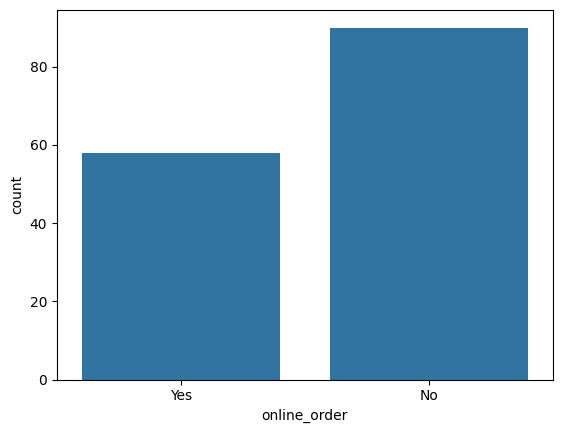

In [94]:
sns.countplot(x=df['online_order'])


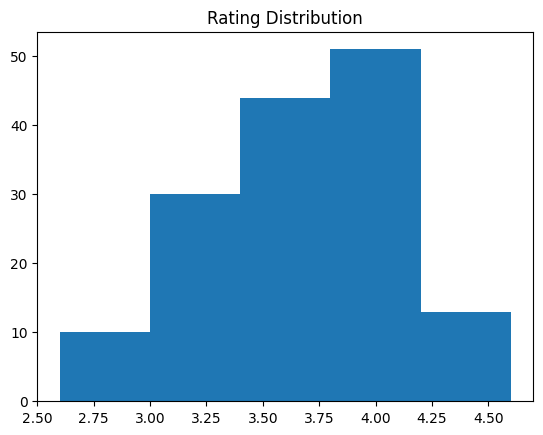

In [95]:
plt.hist(df['rate'],bins=5)
plt.title('Rating Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

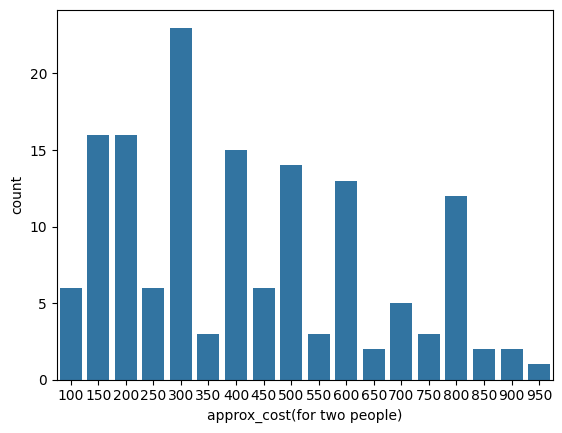

In [96]:
# Approximate cost for couples
sns.countplot(x=df['approx_cost(for two people)'])

<Axes: xlabel='online_order', ylabel='rate'>

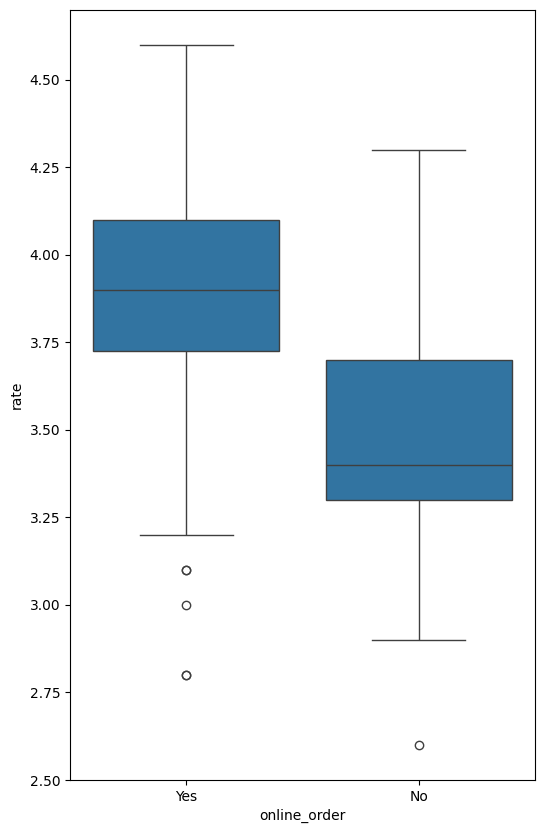

In [97]:
# Rating comparison Online vs offline
plt.figure(figsize=(6,10))
sns.boxplot(x='online_order',y='rate', data=df)

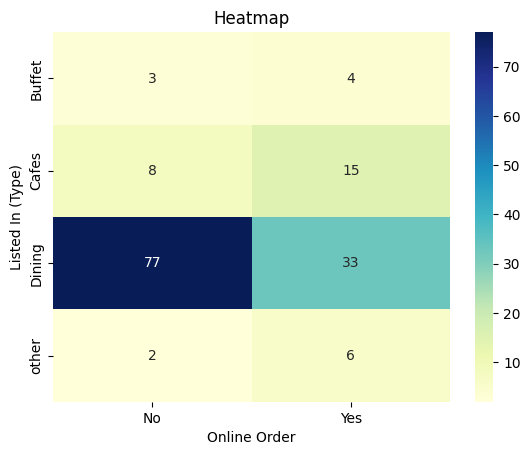

In [98]:
#  Order Mode Preferences by Restaurant Type

p_t = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(p_t, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

In [99]:
# checking the data
df.head()

# here I can see we have name of the restaurant,if they take online orders or offline, can book tables or not, ratings, votes, cost fo two people and type of restaurant 
 

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [100]:
df.shape

(148, 7)

In [101]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [102]:
df.online_order.value_counts()
# out of 148 restaurants, 90 take offline and 58 take online orders 

online_order
No     90
Yes    58
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Online Orders')

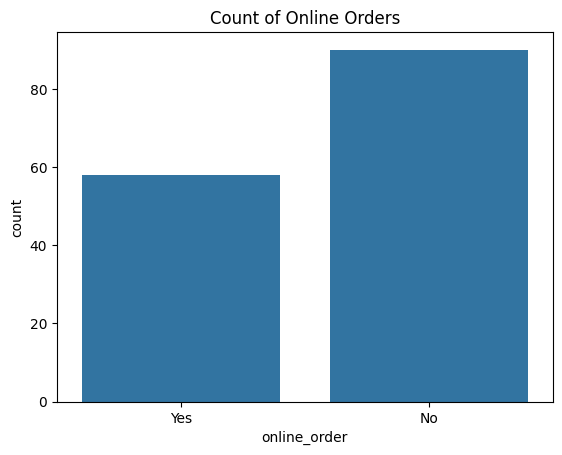

In [103]:
sns.countplot(x=df["online_order"])
plt.title("Count of Online Orders")

In [104]:
df.book_table.value_counts()

book_table
No     140
Yes      8
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Table booking options available or not')

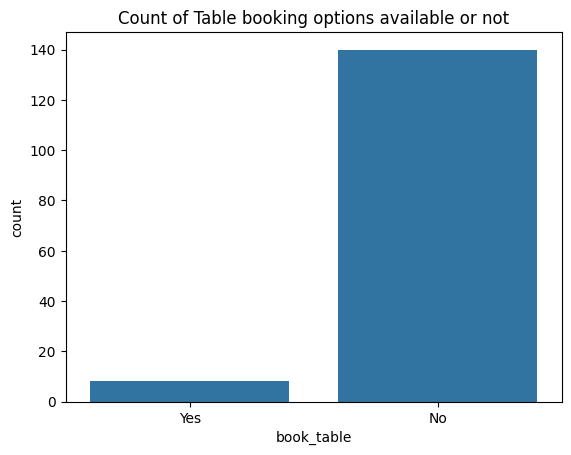

In [105]:
sns.countplot(x=df.book_table)
plt.title("Count of Table booking options available or not")

In [106]:
# cost by type
df['listed_in(type)'].unique()


array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [107]:
df['approx_cost(for two people)'].unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100, 350, 250, 950])

Text(0.5, 1.0, 'Cost by type of restaurants')

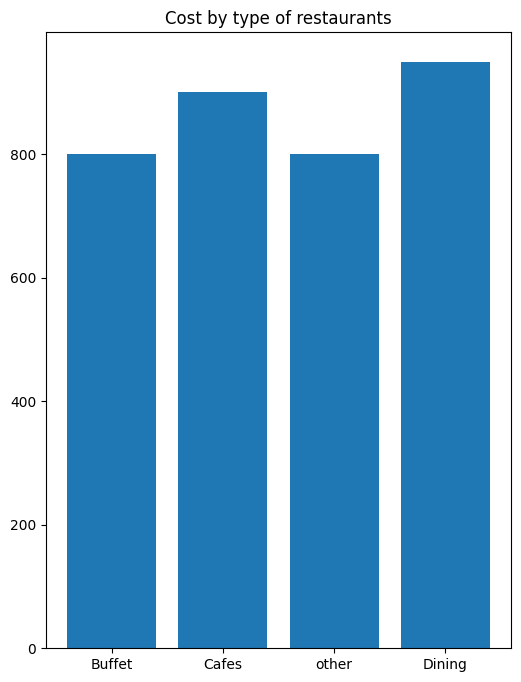

In [108]:
plt.figure(figsize=(6,8))
plt.bar('listed_in(type)','approx_cost(for two people)',data=df)
plt.title("Cost by type of restaurants")

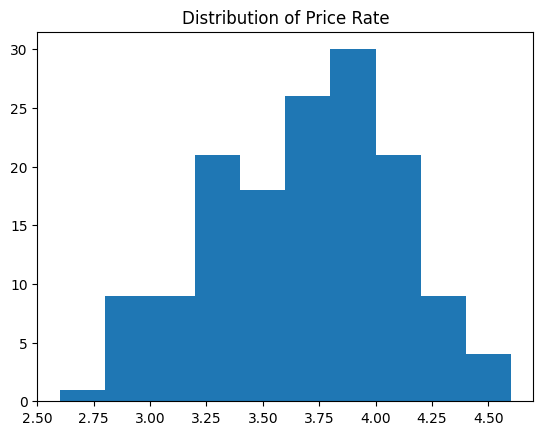

In [109]:
plt.hist(x=df.rate)
plt.title("Distribution of Price Rate")
plt.show()